In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv', sep = ',')

In [3]:
#Shape of training data
fashion_train_df.shape

(60000, 785)

In [4]:
#Shape of test data
fashion_test_df.shape

(10000, 785)

In [0]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [0]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

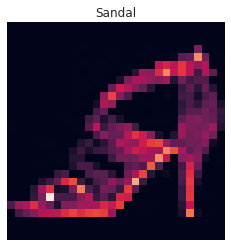

In [7]:
#See a random image for class label verification
i = random.randint(1,60000)
plt.imshow(train[i,1:].reshape((28,28))) 

plt.imshow(train[i,1:].reshape((28,28))) 
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [8]:
#Label of the random image
label = train[i,0]
label

5.0

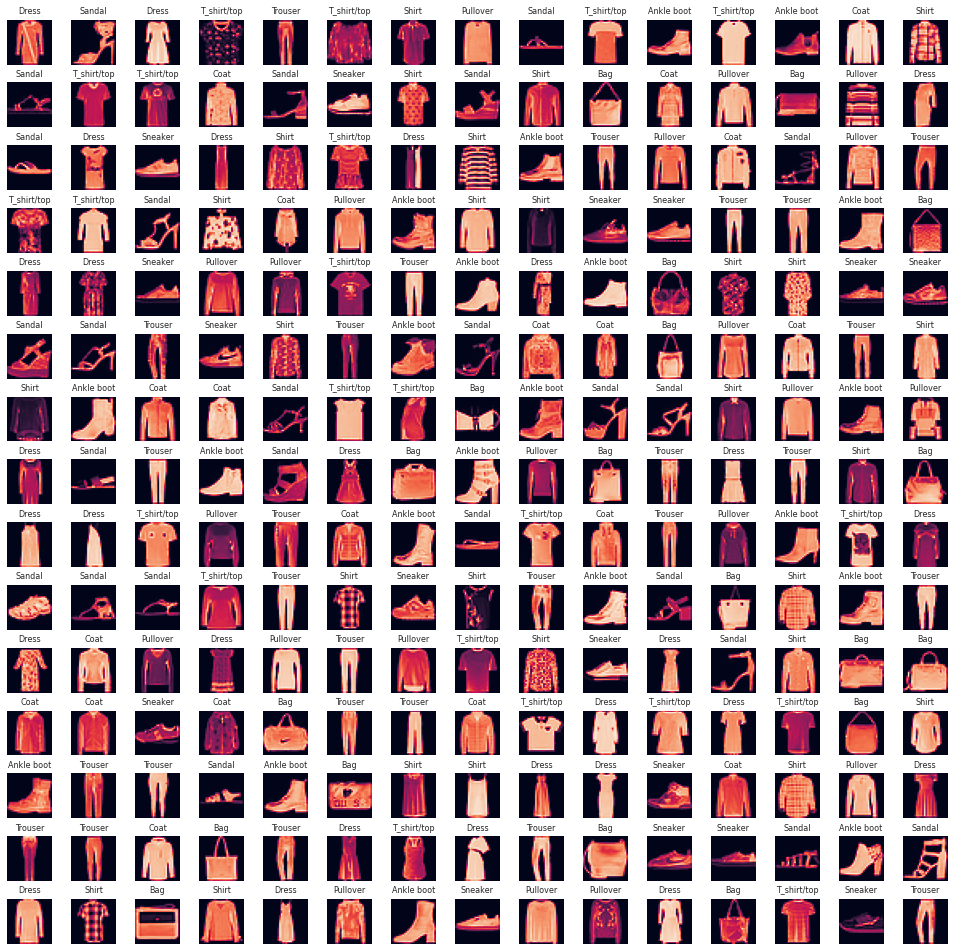

In [9]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [0]:
# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

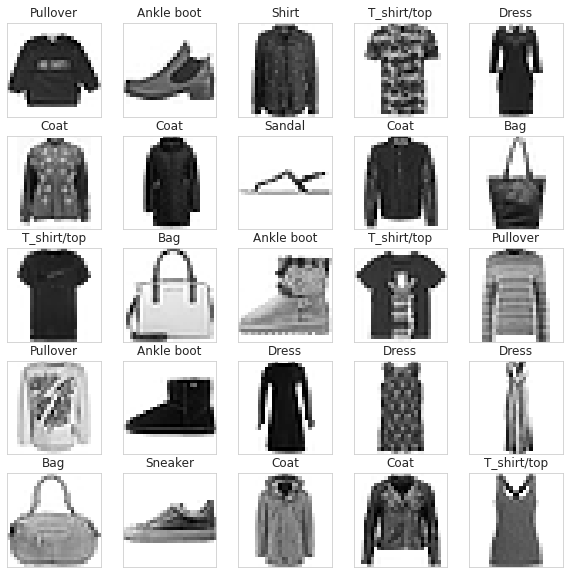

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [12]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [13]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

In [0]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [28]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 200, verbose = 1, validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 4s 77us/step - loss: 1.1433 - accuracy: 0.5703 - val_loss: 0.6761 - val_accuracy: 0.7451
Epoch 2/200
48000/48000 [==============================] - 3s 61us/step - loss: 0.6888 - accuracy: 0.7416 - val_loss: 0.5761 - val_accuracy: 0.7837
Epoch 3/200
48000/48000 [==============================] - 3s 61us/step - loss: 0.6073 - accuracy: 0.7756 - val_loss: 0.5166 - val_accuracy: 0.8104
Epoch 4/200
48000/48000 [==============================] - 3s 61us/step - loss: 0.5527 - accuracy: 0.7960 - val_loss: 0.4665 - val_accuracy: 0.8302
Epoch 5/200
48000/48000 [==============================] - 3s 61us/step - loss: 0.5111 - accuracy: 0.8111 - val_loss: 0.4398 - val_accuracy: 0.8403
Epoch 6/200
48000/48000 [==============================] - 3s 61us/step - loss: 0.4868 - accuracy: 0.8213 - val_loss: 0.4156 - val_accuracy: 0.8457
Epoch 7/200
48000/48000 [==============================] - 3s 

In [31]:
score1 = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1]*100)

Test loss: 0.2573165643930435
Test accuracy: 90.7800018787384


Text(0.5, 1.0, 'Accuracy evolution')

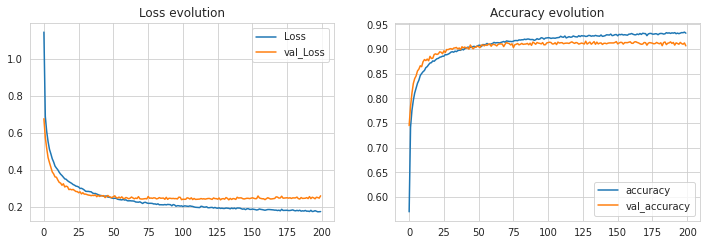

In [29]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [0]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

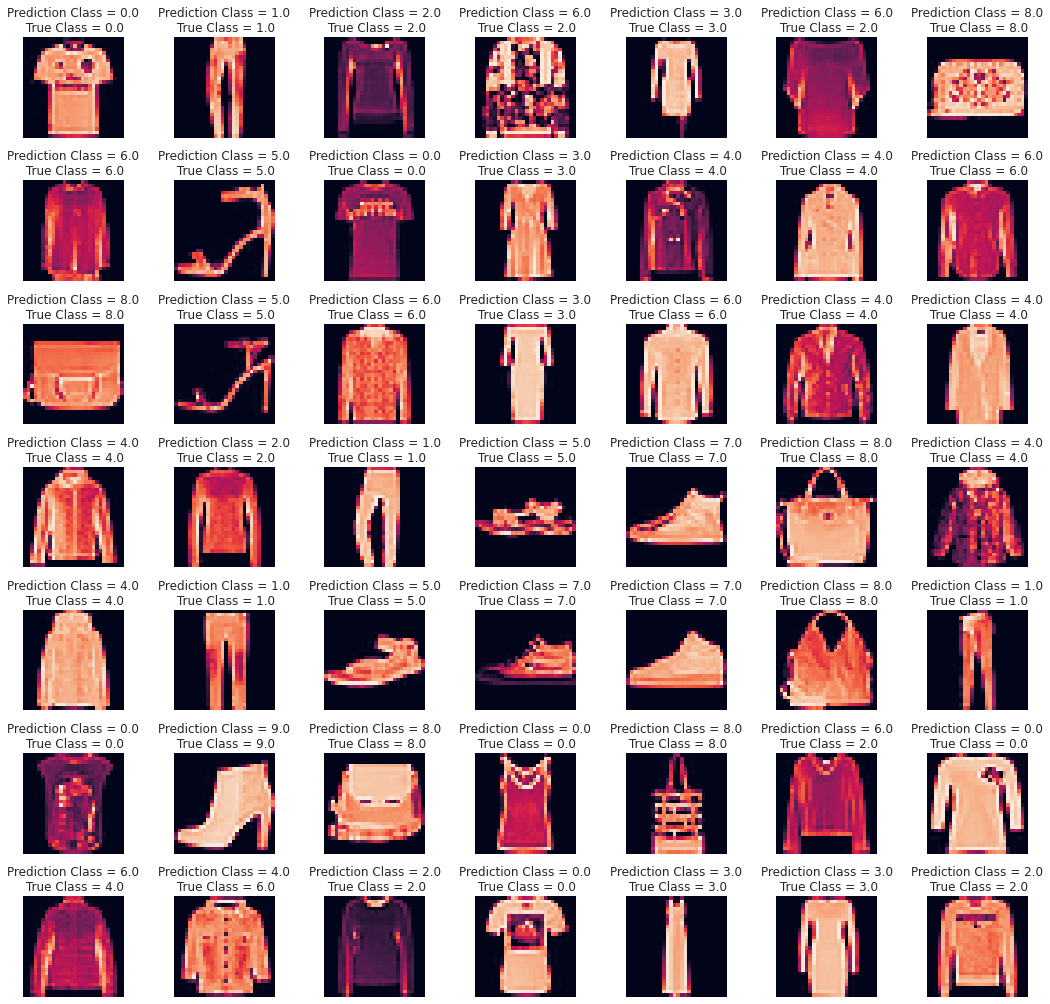

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (18,18))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [0]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1440x1440 with 0 Axes>

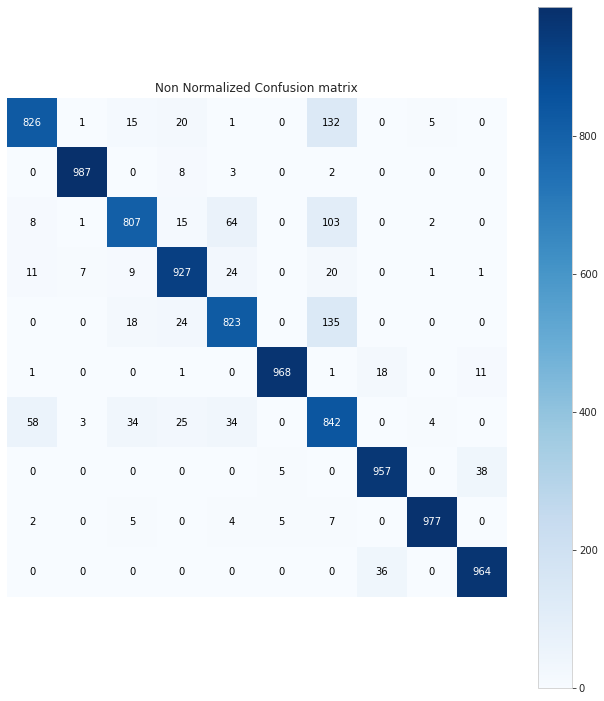

In [38]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, title='Non Normalized Confusion matrix')
plt.axis('off')

Normalized confusion matrix


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1440x1440 with 0 Axes>

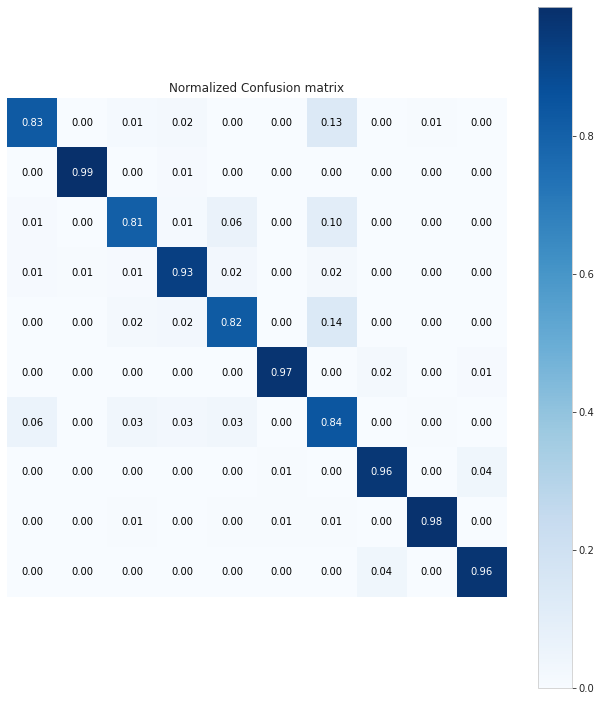

In [40]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, normalize=True, title='Normalized Confusion matrix')
plt.axis('off')

In [41]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.83      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.81      0.85      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.86      0.82      0.84      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.68      0.84      0.75      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.95      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  import sys


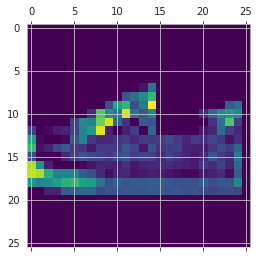

In [51]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn_model.layers[:8]]
test_im = X_train[22]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn_model.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 3rd channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


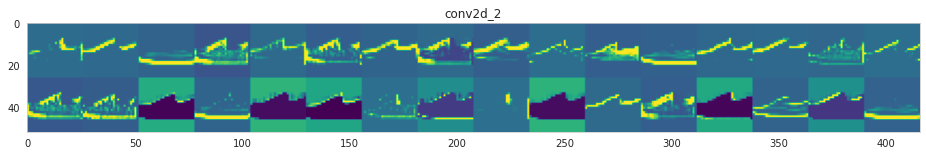

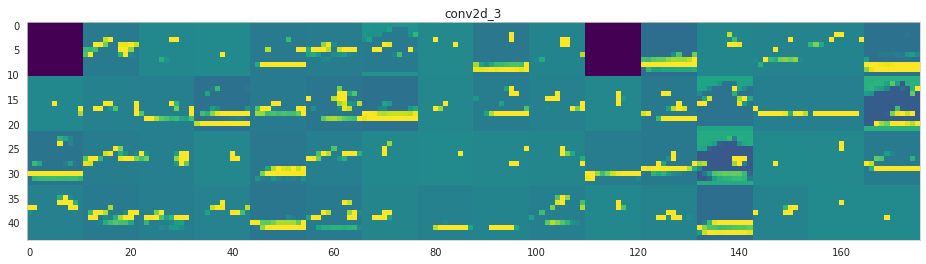

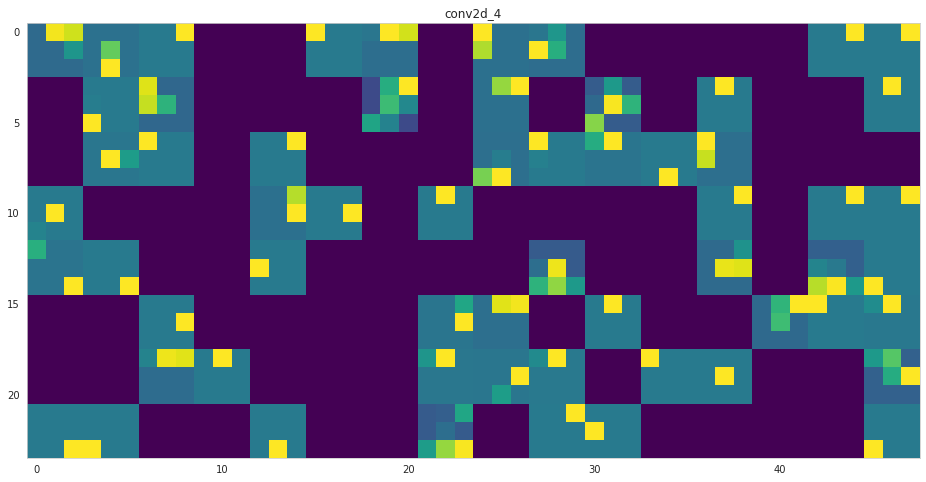

In [52]:
layer_names = []
for layer in cnn_model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')